

```
# This is formatted as code
```

# Heart Disease Prediction using **KNN, SVM, Random Forest, Gradient Boosting** 🫀
---



## Package installation and import

In [1]:
!pip install --upgrade pip
!pip install pandas-profiling

     ---------------------------------------- 2.1/2.1 MB 1.9 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\akmal\anaconda3\python.exe -m pip install --upgrade pip


     ------------------------------------- 324.4/324.4 kB 10.1 MB/s eta 0:00:00
     ------------------------------------- 352.3/352.3 kB 22.8 MB/s eta 0:00:00
     ---------------------------------------- 296.5/296.5 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 152.1/152.1 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 663.4/663.4 kB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=07a1f1264f67e44be0f5bddd170900df9e541932fda94f55982f7a04f1c0bac7
  Stored in directory: c:\users\akmal\appdata\local\pip\cache\wheels\ea\1c\a8\5cec3479cd45136a7111e2d96aac299b219b199c4

In [2]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
import ydata_profiling as pp

# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
#ensembling
#from mlxtend.classifier import StackingCVClassifier

## Exploring the Dataset

In [3]:
df = pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check for null values in the DataFrame
df.isnull()
# Count the number of null values in the DataFrame
df.isnull().sum()
# Check if there are any null values in the DataFrame
df.isnull().values.any()

False

In [6]:
duplicates = df.duplicated()

df.duplicated().values.any()

True

<Axes: >

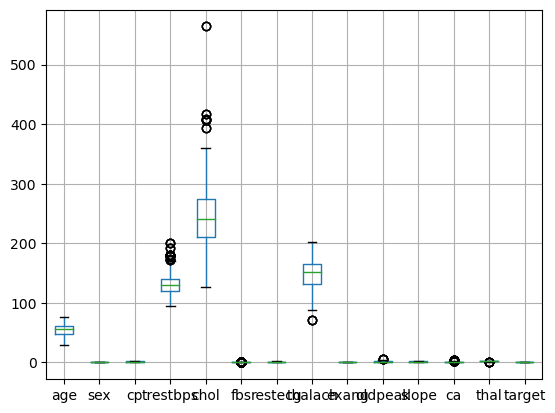

In [7]:
# Identify outliers
df.boxplot()

In [8]:
#Just to see data description (the cantik way)
#Can even check out other things like CORRELATIONS
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Modelling

In [9]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

### KNN

Minimum error:- 0.0 at K = 1


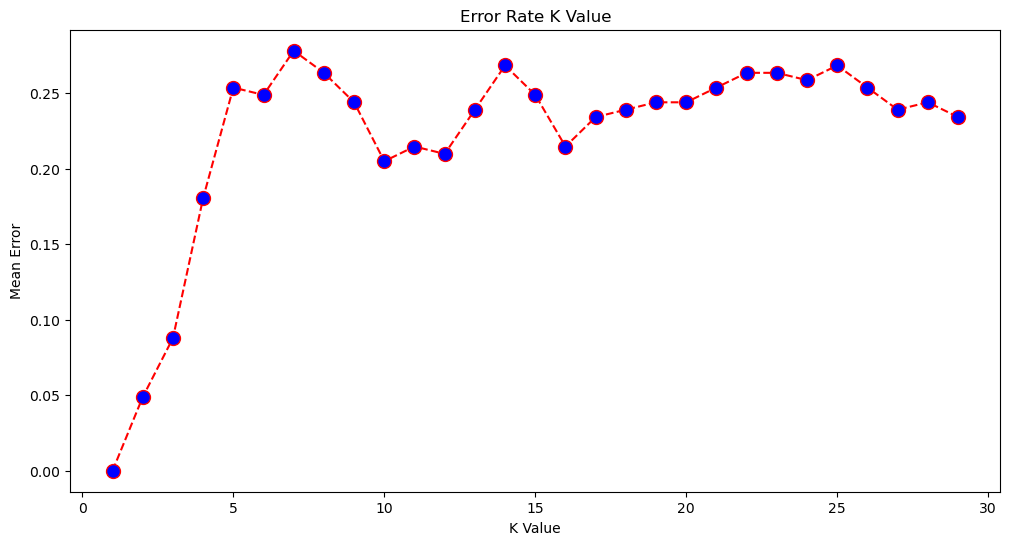

In [10]:
#Checking the best value for k

error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [11]:
#Applying KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)

knn_conf_matrix = confusion_matrix(y_test, knn.predict(X_test))
knn_acc_score = accuracy_score(y_test,knn.predict(X_test))

print('KNN Test Accuracy:',knn_acc_score)
print(confusion_matrix(y_test,knn.predict(X_test)))

import joblib
joblib.dump(knn,'knn_clf.pkl')

KNN Test Accuracy: 0.7560975609756098
[[74 24]
 [26 81]]


['knn_clf.pkl']

### SVM

In [12]:
#Create a svm Classifier
svm = SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)
svm_conf_matrix = (confusion_matrix(y_test, svm.predict(X_test)))
svm_acc_score = accuracy_score(y_test, svm.predict(X_test))

# Model Accuracy: how often is the classifier correct?
print('SVM Test Accuracy:', accuracy_score(y_test, svm.predict(X_test)))
print(svm_conf_matrix)

import joblib
joblib.dump(svm,'svm_clf.pkl')

SVM Test Accuracy: 0.8390243902439024
[[74 24]
 [ 9 98]]


['svm_clf.pkl']

### Random Forest Model

In [13]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

import joblib
joblib.dump(rf,'rf_clf.pkl')

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



['rf_clf.pkl']

### Gradient Boosting Model

In [14]:
# Create the Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_predicted = gb.predict(X_test)

# Calculate accuracy and other metrics
gb_acc_score = accuracy_score(y_test, gb_predicted)
gb_conf_matrix = confusion_matrix(y_test, gb_predicted)

print("Confusion matrix:")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:", gb_acc_score * 100)
print("\n")
print("Classification Report:")
print(classification_report(y_test, gb_predicted))

import joblib
joblib.dump(gb,'gb_clf.pkl')

Confusion matrix:
[[ 90   8]
 [  4 103]]


Accuracy of Gradient Boosting: 94.14634146341463


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.93      0.96      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



['gb_clf.pkl']

## Evaluation (Needs updating for new models)

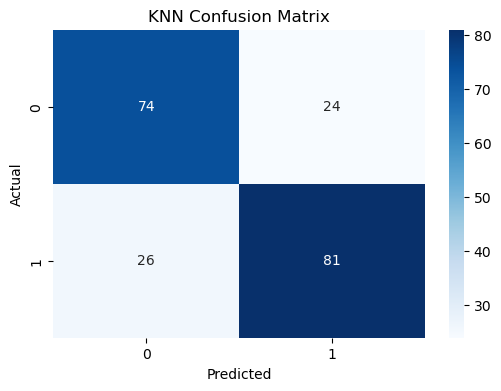

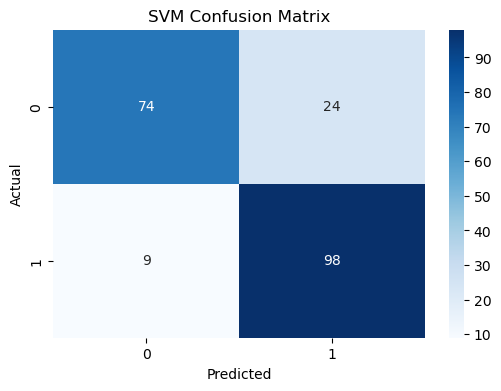

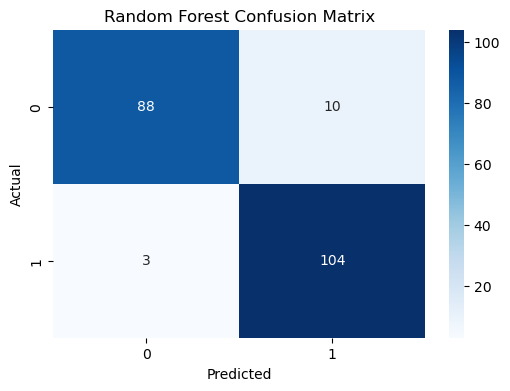

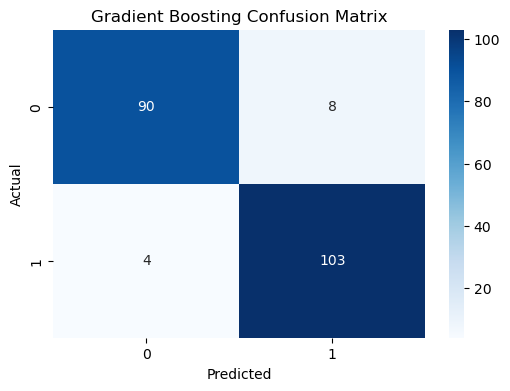

K-Nearest Neighbour Accuracy: 75.60975609756098
Support Vector Machine Accuracy: 83.90243902439025
Random Forest Accuracy: 93.65853658536587
Gradient Boosting Accuracy: 94.14634146341463


In [15]:
# Visualization
# Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation
print("K-Nearest Neighbour Accuracy:", knn_acc_score * 100)
print("Support Vector Machine Accuracy:", svm_acc_score * 100)
print("Random Forest Accuracy:", rf_acc_score * 100)
print("Gradient Boosting Accuracy:", gb_acc_score * 100)

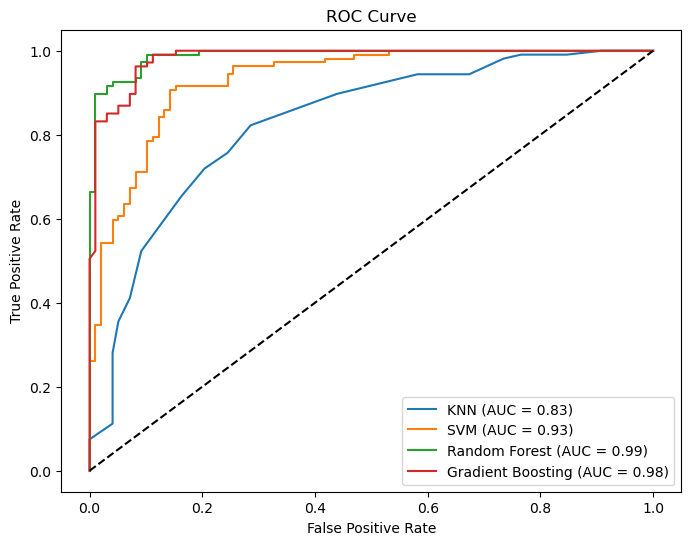

K-Nearest Neighbor AUC: 0.8294392523364486
Support Vector Machine AUC: 0.9320045775319473
Random Forest AUC: 0.9887469006294106
Gradient Boosting AUC: 0.9834064466908259


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for KNN
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

# ROC Curve for SVM
svm_probs = svm.predict_proba(X_test)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# ROC Curve for Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# ROC Curve for Gradient Boosting
gb_probs = gb.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plotting the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(gb_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random Guess Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC scores
print("K-Nearest Neighbor AUC:", knn_auc)
print("Support Vector Machine AUC:", svm_auc)
print("Random Forest AUC:", rf_auc)
print("Gradient Boosting AUC:", gb_auc)

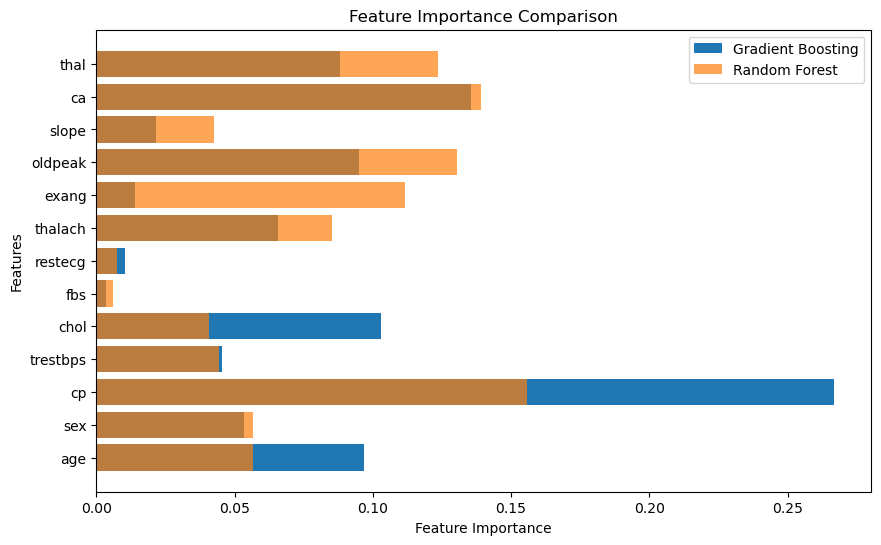

In [17]:
# Feature Importance - KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Feature Importance - SVM
svm = SVC(kernel='linear', probability=True) # Linear Kernel
svm.fit(X_train, y_train)

# Feature Importance - Gradient Boosting
gb = GradientBoostingClassifier(random_state=12, max_depth=5)
gb.fit(X_train, y_train)

# Feature Importance - Random Forest
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

# Combine feature importances from both models
importances_gb = gb.feature_importances_
importances_rf = rf.feature_importances_
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_gb, label='Gradient Boosting')
plt.barh(feature_names, importances_rf, alpha=0.7, label='Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison')
plt.legend()
plt.show()

